## 01 - Data Exploration (Understanding Data)

Read raw data tables saved as csv format  
Perform exploratory analysis to understand the data  
Perform simple Machine Learning algorithm for weather prediction  
The data used id provided within the folder if this note book  

In [2]:
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [4]:
#Read CSV Data File
df = pd.read_csv("weather.csv")
df.head(10)

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,8.0,24.3,0.0,3.4,6.3,NW,30.0,SW,NW,6.0,...,29,1019.7,1015.0,7,7,14.4,23.6,No,3.6,Yes
1,14.0,26.9,3.6,4.4,9.7,ENE,39.0,E,W,4.0,...,36,1012.4,1008.4,5,3,17.5,25.7,Yes,3.6,Yes
2,13.7,23.4,3.6,5.8,3.3,NW,85.0,N,NNE,6.0,...,69,1009.5,1007.2,8,7,15.4,20.2,Yes,39.8,Yes
3,13.3,15.5,39.8,7.2,9.1,NW,54.0,WNW,W,30.0,...,56,1005.5,1007.0,2,7,13.5,14.1,Yes,2.8,Yes
4,7.6,16.1,2.8,5.6,10.6,SSE,50.0,SSE,ESE,20.0,...,49,1018.3,1018.5,7,7,11.1,15.4,Yes,0.0,No
5,6.2,16.9,0.0,5.8,8.2,SE,44.0,SE,E,20.0,...,57,1023.8,1021.7,7,5,10.9,14.8,No,0.2,No
6,6.1,18.2,0.2,4.2,8.4,SE,43.0,SE,ESE,19.0,...,47,1024.6,1022.2,4,6,12.4,17.3,No,0.0,No
7,8.3,17.0,0.0,5.6,4.6,E,41.0,SE,E,11.0,...,57,1026.2,1024.2,6,7,12.1,15.5,No,0.0,No
8,8.8,19.5,0.0,4.0,4.1,S,48.0,E,ENE,19.0,...,48,1026.1,1022.7,7,7,14.1,18.9,No,16.2,Yes
9,8.4,22.8,16.2,5.4,7.7,E,31.0,S,ESE,7.0,...,32,1024.1,1020.7,7,1,13.3,21.7,Yes,0.0,No


In [11]:
# View dataframe column/ row information, size and data types 
# df.head()
# df.tail()
# df.shape
# df.index
# df.dtypes
# df.columns

cols = []
for col in df.columns:
    cols.append(col)
print (cols)


['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm', 'RainToday', 'RISK_MM', 'RainTomorrow']


In [72]:
df['Rainfall'].unique() # Display non duplicate values (unique) #type:ignore
df.nunique() # Display a total of unique values
# df['Evaporation'].value_counts()
# df.count # Display a total of not null values
# df.isna().sum() # Check null values
# df.info()
df.dtypes
# df.info()

array([ 0. ,  3.6, 39.8,  2.8,  0.2, 16.2,  1.2,  0.6,  0.4, 25.8, 22.6,
        4.2,  6.6,  4. ,  5.4,  1.4,  3.4,  6.4, 11. , 17.4, 14.4,  2. ,
        4.8, 18.8, 12.2,  0.8,  5.2,  2.2,  1.8,  9. ,  1. ,  4.4, 10.4,
        3. , 19.8,  2.6,  7.2,  3.8,  6.2, 16.8,  1.6, 19.2,  7.4,  9.8,
        7.6,  8.2, 13.2])

In [8]:
df.describe() # Calculate mean, std, variance etc


,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RISK_MM
count,366.000000,366.000000,366.000000,366.000000,363.000000,364.000000,359.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000
mean,7.265574,20.550273,1.428415,4.521858,7.909366,39.840659,9.651811,17.986339,72.035519,44.519126,1019.709016,1016.810383,3.890710,4.024590,12.358470,19.230874,1.428415
std,6.025800,6.690516,4.225800,2.669383,3.481517,13.059807,7.951929,8.856997,13.137058,16.850947,6.686212,6.469422,2.956131,2.666268,5.630832,6.640346,4.225800
min,-5.300000,7.600000,0.000000,0.200000,0.000000,13.000000,0.000000,0.000000,36.000000,13.000000,996.500000,996.800000,0.000000,0.000000,0.100000,5.100000,0.000000
25%,2.300000,15.025000,0.000000,2.200000,5.950000,31.000000,6.000000,11.000000,64.000000,32.250000,1015.350000,1012.800000,1.000000,1.000000,7.625000,14.150000,0.000000
50%,7.450000,19.650000,0.000000,4.200000,8.600000,39.000000,7.000000,17.000000,72.000000,43.000000,1020.150000,1017.400000,3.500000,4.000000,12.550000,18.550000,0.000000
75%,12.500000,25.500000,0.200000,6.400000,10.500000,46.000000,13.000000,24.000000,81.000000,55.000000,1024.475000,1021.475000,7.000000,7.000000,17.000000,24.000000,0.200000
max,20.900000,35.800000,39.800000,13.800000,13.600000,98.000000,41.000000,52.000000,99.000000,96.000000,1035.700000,1033.200000,8.000000,8.000000,24.700000,34.500000,39.800000


In [43]:
# Rename a column
df.rename (columns = {'Wind Gust Speed' : 'WindGustSpeed'}, inplace = True)
df.columns

Index(['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RISK_MM', 'RainTomorrow'],
      dtype='object')

In [51]:
df.dtypes
df.duplicated().sum() # Check duplicates
# df1 = df.drop(["WindGustDir", "RainToday", "RainTomorrow"], axis = 1) # Delete columns
# df1 = df.drop(columns = ["WindGustDir", "RainToday", "RainTomorrow"], inplace = True) # Delete columns
# df1.dtypes
# df.shape
# del(df1)
# df1

0

In [60]:
# Select multiple columns by conditions
df[(df['WindGustSpeed'] < 30)  & (df['Rainfall'] > 0.1)]


,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
21,16.4,19.4,0.4,9.2,0.0,E,26.0,ENE,E,6.0,...,72,1010.7,1008.9,8,8,16.5,18.3,No,25.8,Yes
22,12.8,18.5,25.8,2.8,0.6,ESE,28.0,S,SE,13.0,...,79,1014.0,1014.9,8,8,14.0,16.8,Yes,0.4,No
23,12.0,24.3,0.4,1.2,7.5,NNE,26.0,WSW,NE,6.0,...,57,1020.7,1019.2,7,5,17.8,22.8,No,0.0,No
57,15.1,28.3,14.4,8.8,13.2,NNW,28.0,NNW,NW,6.0,...,44,1016.8,1013.4,1,5,18.3,27.4,Yes,0.0,No
128,9.5,27.4,3.0,4.8,11.5,NNW,24.0,SSE,NNW,6.0,...,39,1024.7,1020.7,1,7,14.0,24.9,Yes,0.0,No
144,15.5,22.4,0.6,4.8,1.9,NW,28.0,SSE,WNW,6.0,...,68,1018.7,1015.4,8,7,17.1,21.1,No,6.4,Yes
180,-2.1,13.8,0.2,1.8,9.5,NNW,22.0,NaN,NNW,0.0,...,40,1020.6,1019.6,0,1,6.3,13.2,No,0.0,No
207,4.7,18.5,3.8,2.0,5.1,ESE,22.0,NNW,W,6.0,...,50,1026.6,1023.1,7,4,7.0,17.9,Yes,5.2,Yes
208,4.9,18.1,5.2,1.2,8.5,NNW,22.0,NaN,NW,0.0,...,55,1025.7,1022.3,1,1,8.9,17.7,Yes,0.0,No
210,2.2,17.5,0.2,1.2,8.5,NW,20.0,SSE,WNW,7.0,...,45,1032.1,1029.6,2,1,5.5,17.3,No,0.0,No


In [82]:
# Select and Explore Numerical columns
numerical_columns = df.select_dtypes(include = 'number')
numerical_columns.describe()

# Select and Explore Categorical Columns
cat_columns = df.select_dtypes(include = 'object')
for t in cat_columns.columns:
    print(t ,' --> ', cat_columns[t].unique(), '\n')


WindGustDir  -->  ['NW' 'ENE' 'SSE' 'SE' 'E' 'S' 'N' 'WNW' 'ESE' 'NE' 'NNE' 'NNW' 'SW' 'W'
 'WSW' 'SSW' nan] 

WindDir9am  -->  ['SW' 'E' 'N' 'WNW' 'SSE' 'SE' 'S' 'WSW' 'NNE' 'NNW' 'ENE' 'SSW' 'NW'
 'ESE' 'NE' 'W' nan] 

WindDir3pm  -->  ['NW' 'W' 'NNE' 'ESE' 'E' 'ENE' 'WSW' 'NE' 'NNW' 'SE' 'S' 'SW' 'WNW' 'N'
 'SSW' 'SSE' nan] 

RainToday  -->  ['No' 'Yes'] 

RainTomorrow  -->  ['Yes' 'No'] 



## 02 - Exploratory Data Analysis

### 2a) Create Count plots for Categorical columns

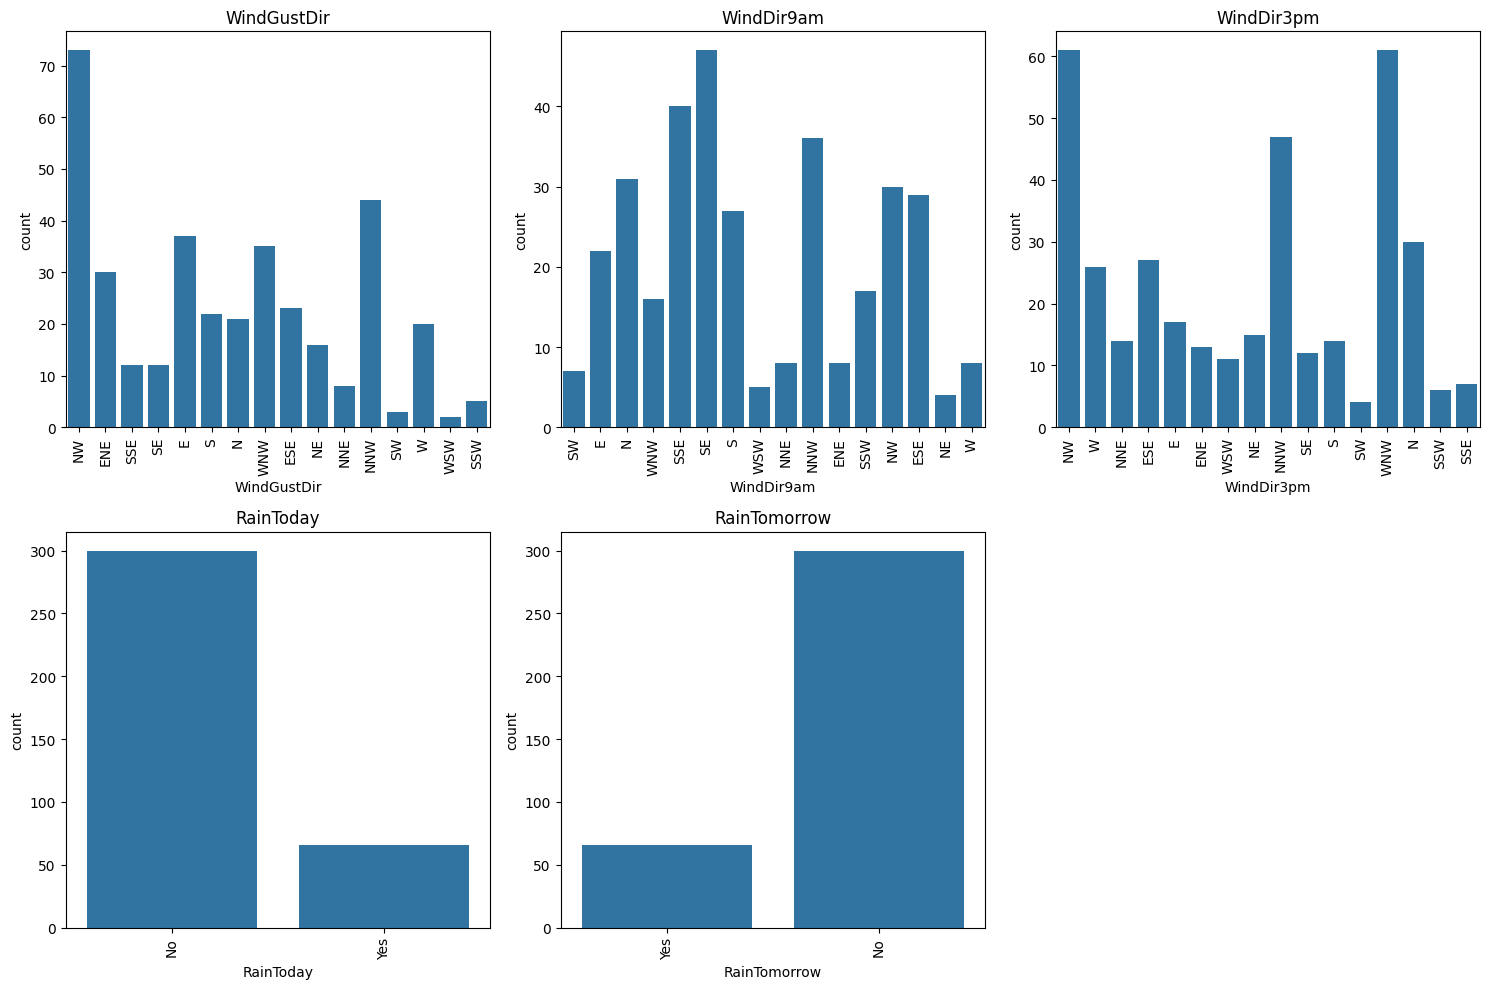

In [83]:
# Get names of all columns with data type 'object' ( cateforical columns)
cat_vars = df.select_dtypes(include = 'object').columns.tolist()

# Create a figure with subplots
num_cols = len(cat_vars)
num_rows = (num_cols + 2) //3 # To make sure there are enough rows for the subplots
fig, axs = plt.subplots(nrows = num_rows, ncols = 3, figsize = (15, 5*num_rows))
axs = axs.flatten()

# Create a countplot for each categorical variable using Searborn
for i, var in enumerate(cat_vars):
    sns.countplot(x = var, data = df, ax = axs[i])
    axs[i].set_title(var)
    axs[i].tick_params(axis = 'x', rotation = 90)

# Remove any extra empty subplots if needed
if num_cols < len(axs):
    for i in range(num_cols, len(axs)):
        fig.delaxes(axs[i])

# Adjusting spacing between subplots
fig.tight_layout()        

# Show plot
plt.show()

### 2b) Create Box plots for Numerical columns

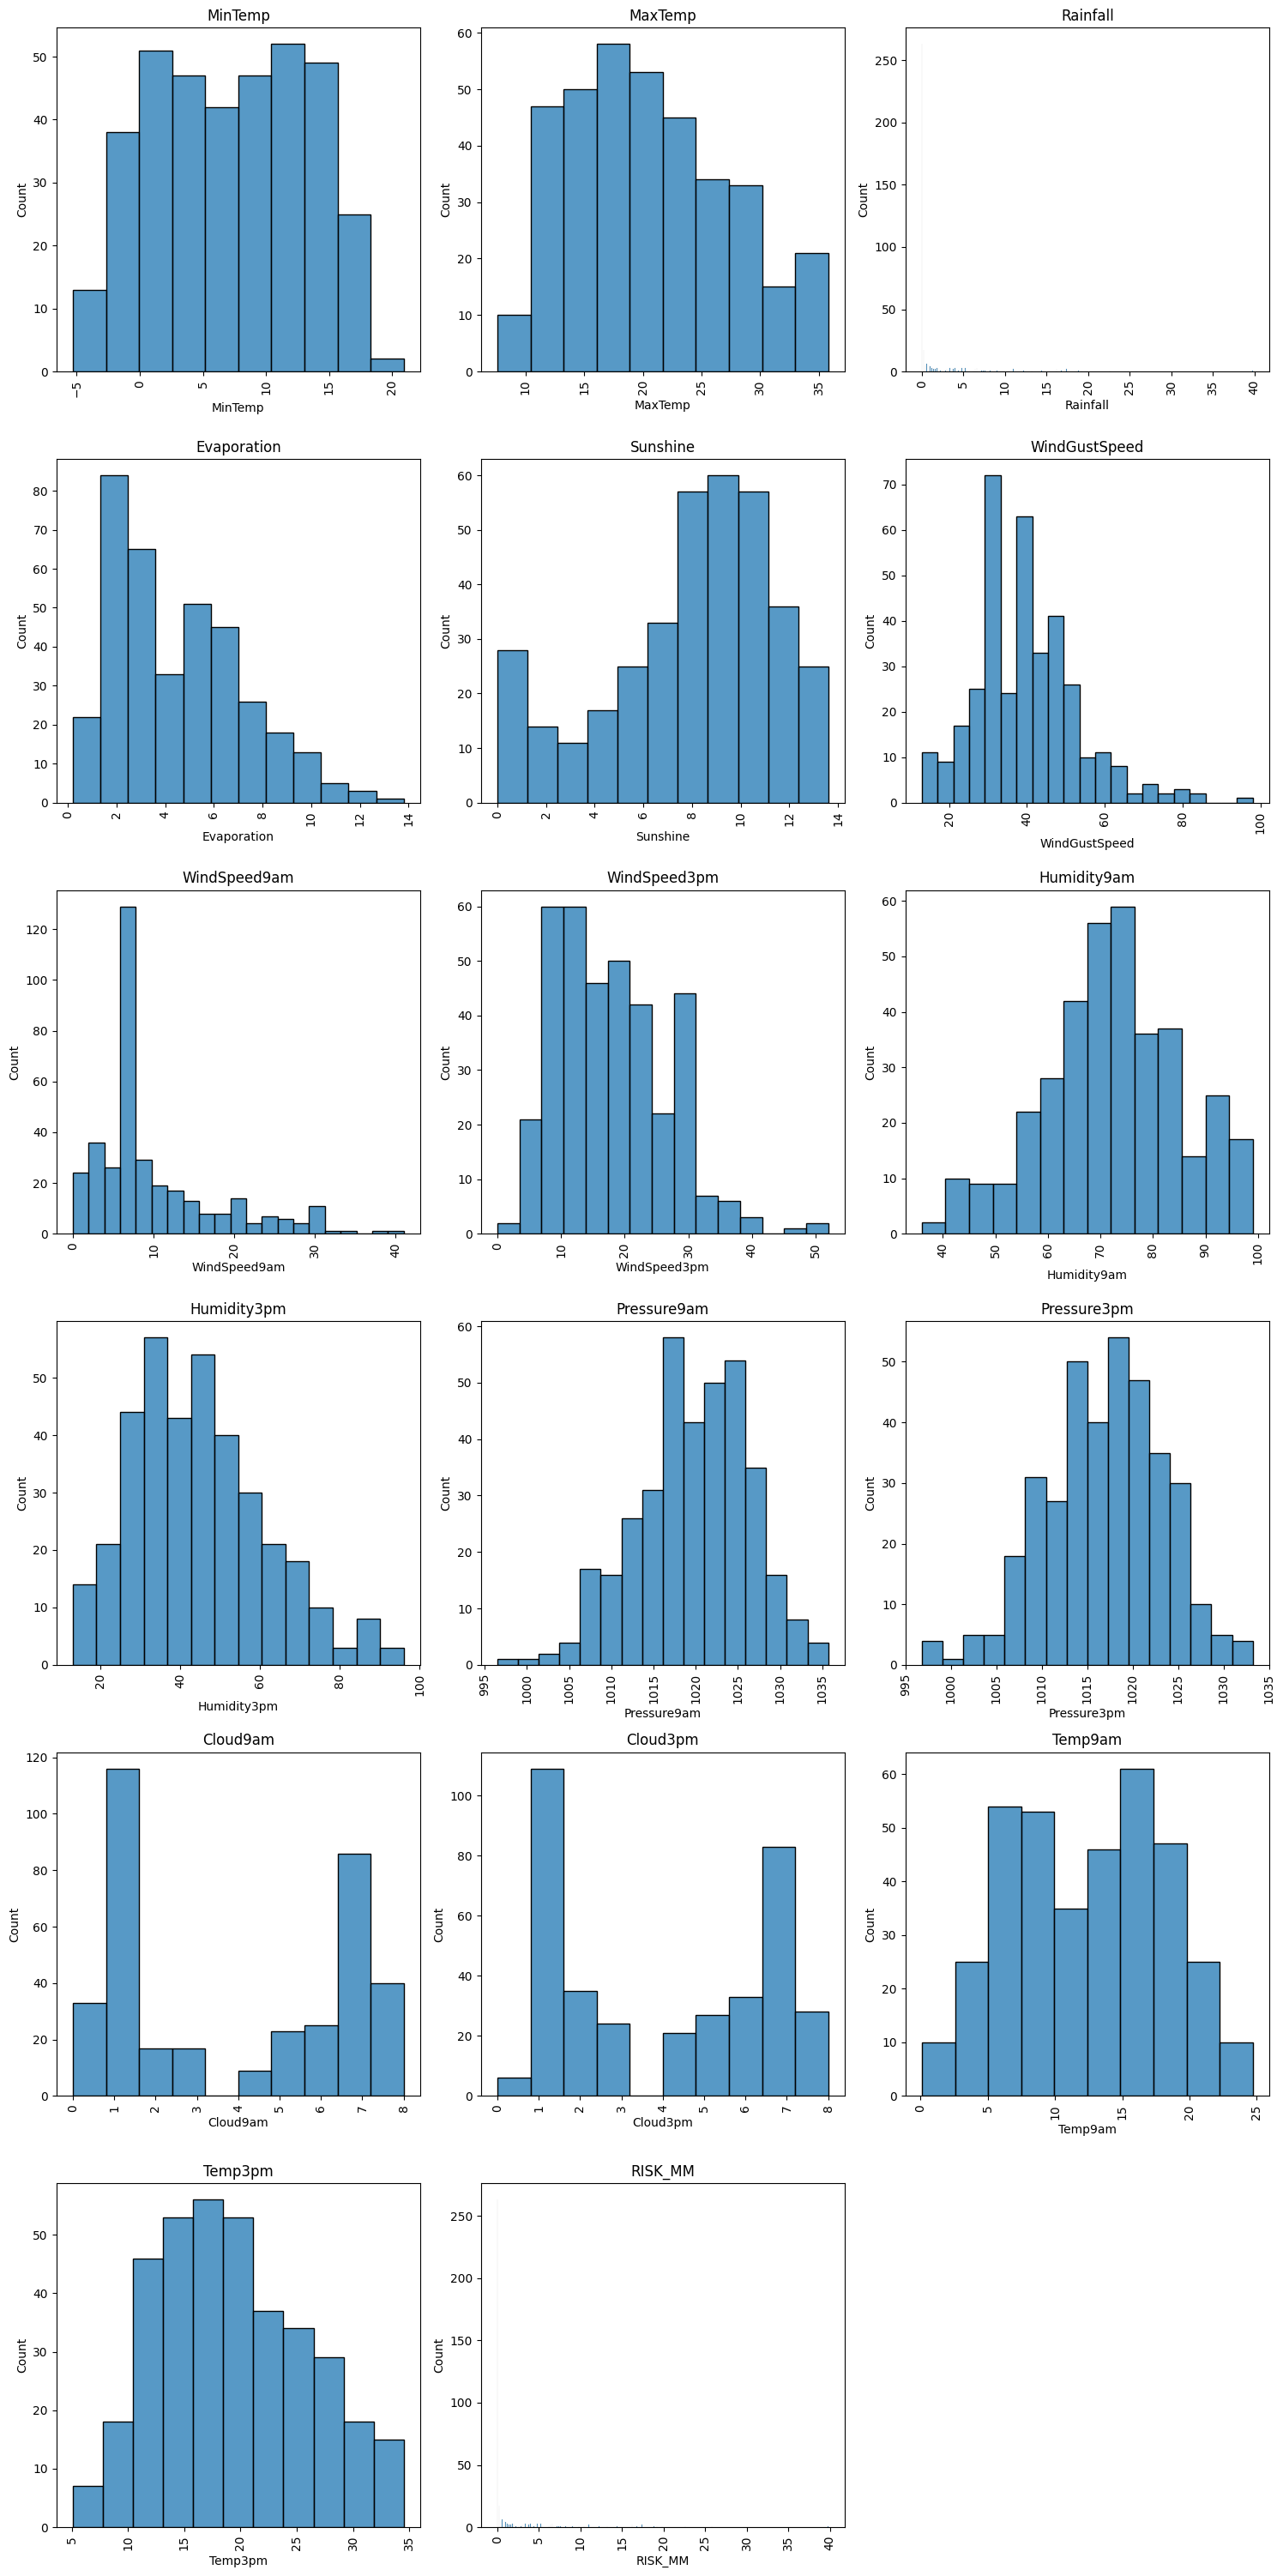

In [86]:
# Get names of all columns with data type 'object' ( cateforical columns)
num_vars = df.select_dtypes(include = 'number').columns.tolist()

# Create a figure with subplots
num_cols = len(num_vars)
num_rows = (num_cols + 2)
fig, axs = plt.subplots(nrows = num_rows, ncols = 3, figsize = (15, 5*num_rows))
axs = axs.flatten()

# Create a countplot for each categorical variable using Searborn
for i, var in enumerate(num_vars):
    sns.histplot(x = df[var], ax = axs[i])
    axs[i].set_title(var)
    axs[i].tick_params(axis = 'x', rotation = 90)

# Remove any extra empty subplots if needed
if num_cols < len(axs):
    for i in range(num_cols, len(axs)):
        fig.delaxes(axs[i])

# Adjusting spacing between subplots
fig.tight_layout()        

# Show plot
plt.show()

### 2c) Create Box plots for Numerical columns (With Attrition)

In [82]:
df.dtypes
df['Rainfall']

0       0.0
1       3.6
2       3.6
3      39.8
4       2.8
       ... 
361     0.0
362     0.0
363     0.0
364     0.0
365     0.0
Name: Rainfall, Length: 366, dtype: float64

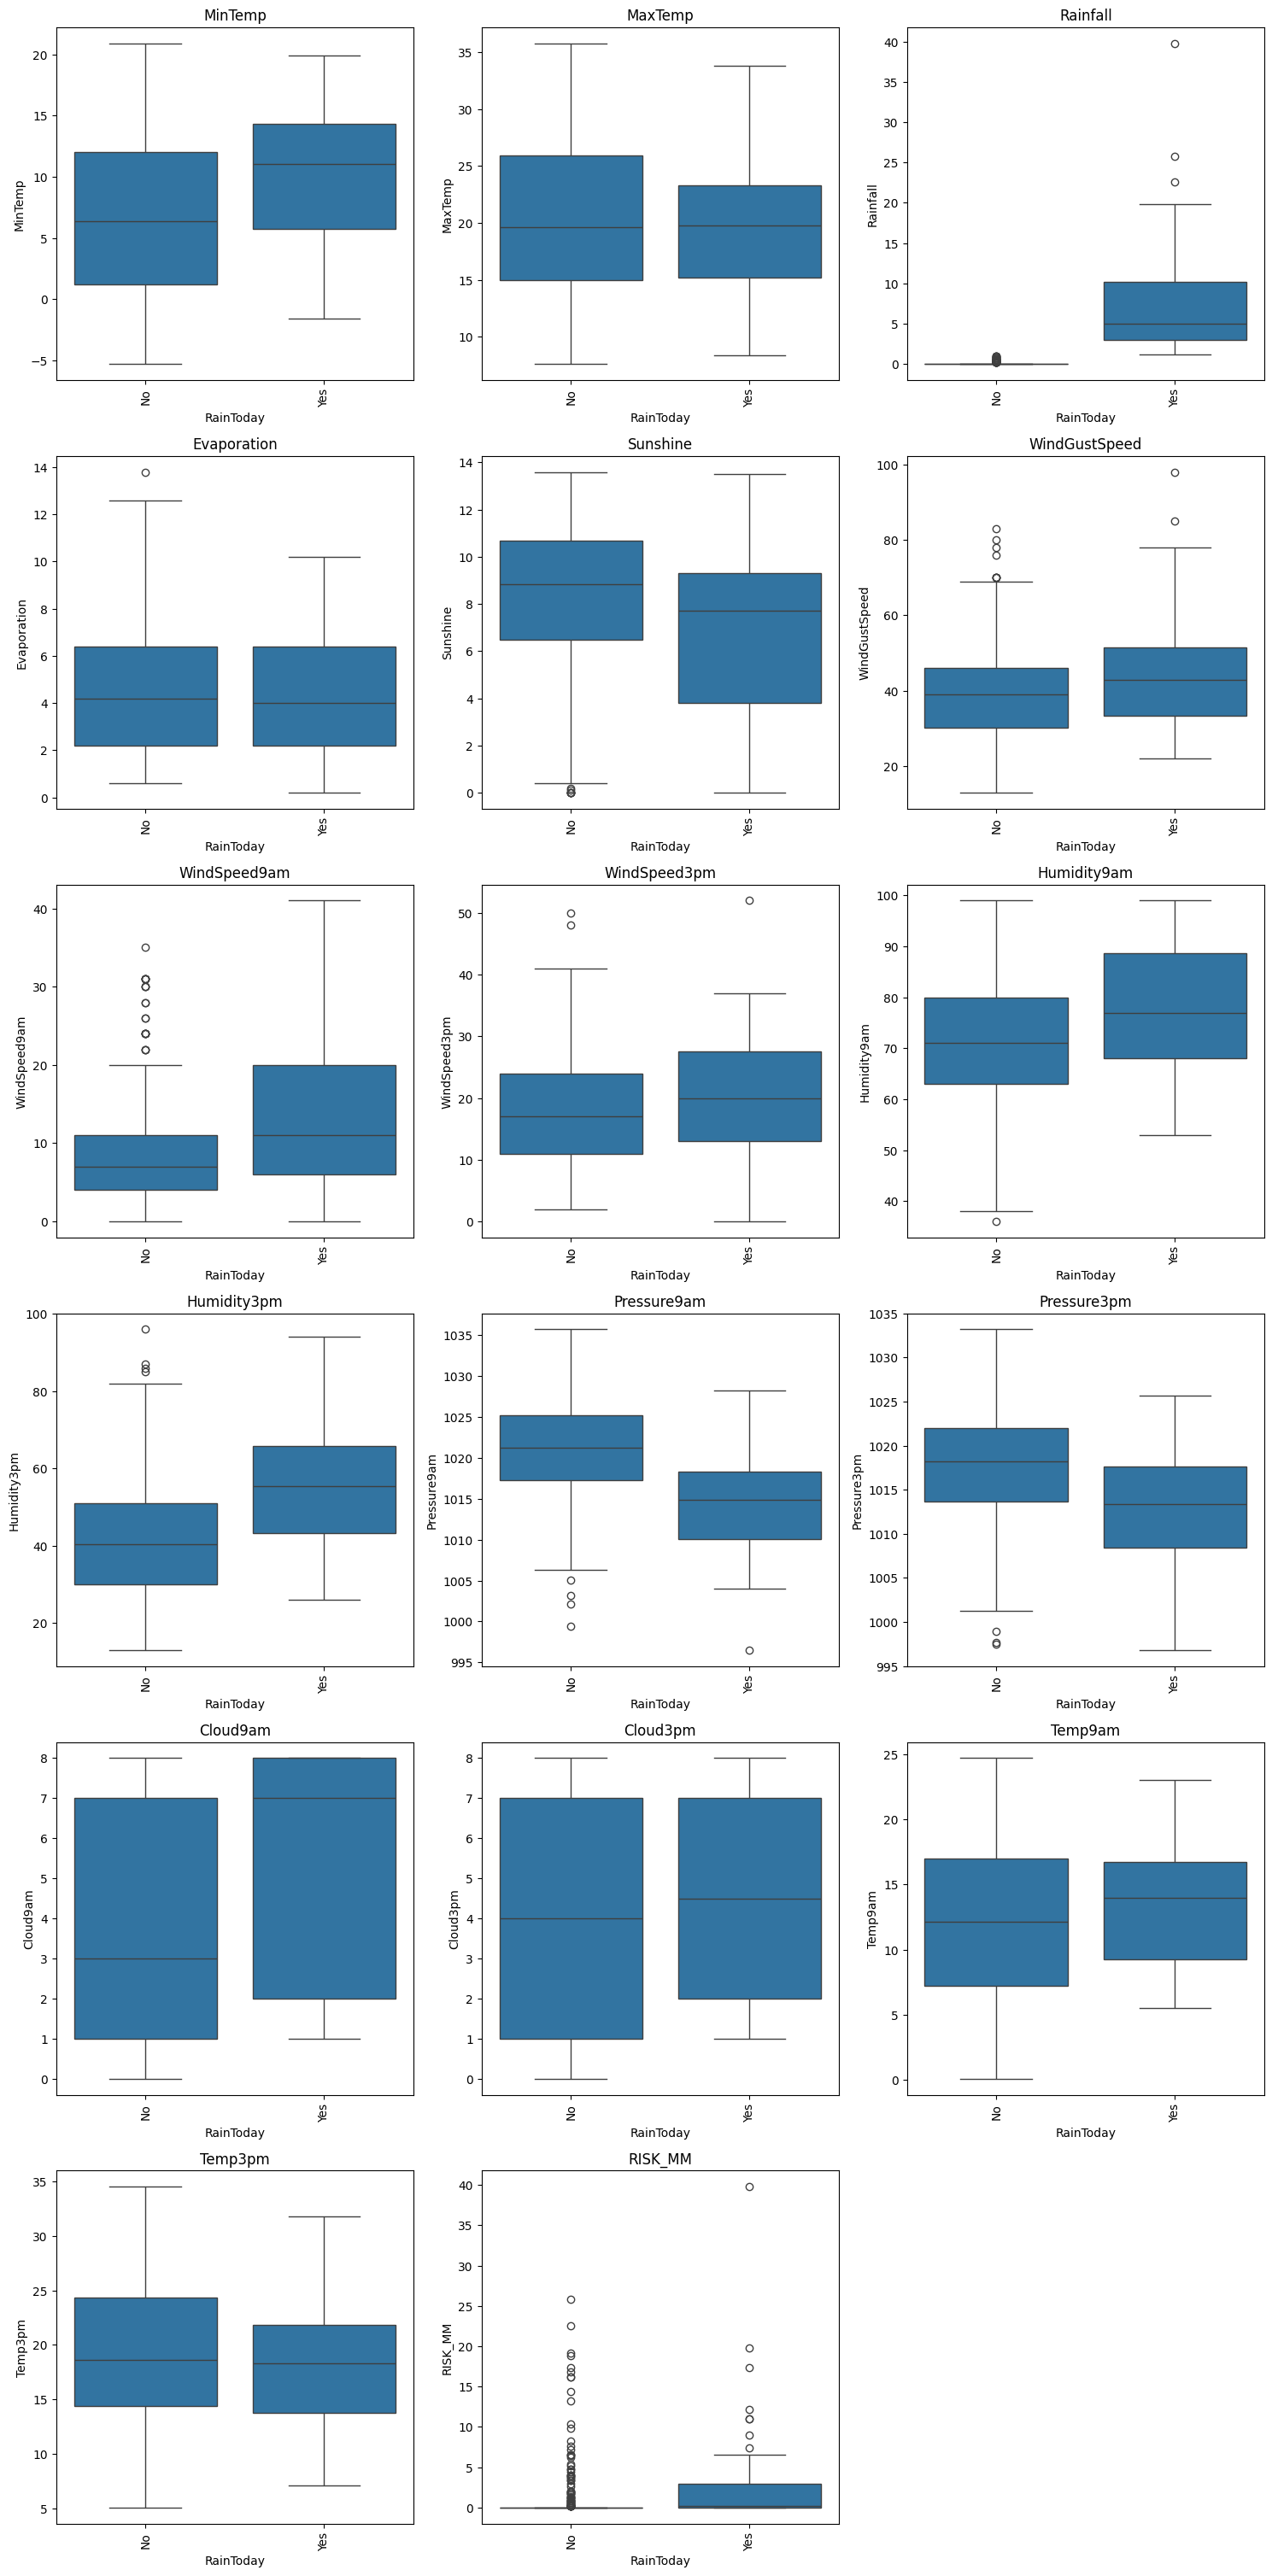

In [89]:
# Get names of all columns with data type 'object' ( cateforical columns)
num_vars = df.select_dtypes(include = 'number').columns.tolist()

# Create a figure with subplots
num_cols = len(num_vars)
num_rows = (num_cols + 2)
fig, axs = plt.subplots(nrows = num_rows, ncols = 3, figsize = (15, 5*num_rows))
axs = axs.flatten()

# Create a countplot for each categorical variable using Searborn
for i, var in enumerate(num_vars):
    sns.boxplot(y = var, x = 'RainToday', data = df, ax = axs[i])
    axs[i].set_title(var)
    axs[i].tick_params(axis = 'x', rotation = 90)

# Remove any extra empty subplots if needed
if num_cols < len(axs):
    for i in range(num_cols, len(axs)):
        fig.delaxes(axs[i])

# Adjusting spacing between subplots
fig.tight_layout()        

# Show plot
plt.show()

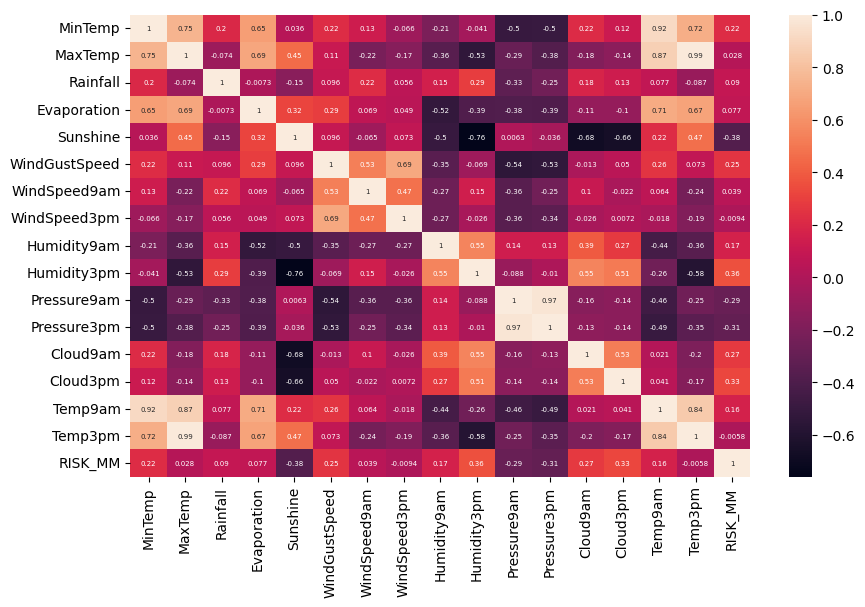

In [6]:
# Finding Correlation
cors = df.select_dtypes(include = 'number')
plt.figure(figsize = (10, 6))
sns.heatmap(data = cors.corr(), annot = True, annot_kws={'size': 5})
plt.show()

In [ ]:
# Scatterplot of Rainfall vs all columns
for column in numerical_columns:
    plt.figure(figsize = (10, 6))
    sns.scatterplot(data = numerical_columns, x = numerical_columns[column], y = numerical_columns["Rainfall"])
    plt.xlabel(column, weight = "bold", fontsize = 12, labelpad = 10)
    plt.ylabel("Rainfall", weight = "bold", fontsize = 12, labelpad = 10)
    plt.xticks(weight = "bold")
    plt.yticks(weight = "bold")
    plt.show()

In [ ]:
# Distribution of Rainfall Column
plt.figure(figsize = (10, 6))
ax = sns.histplot(data = numerical_columns, x = numerical_columns["Rainfall"])
plt.title("Distribution of Rainfall Column")
plt.xlabel("Rainfall", weight = "bold", fontsize = 12, labelpad = 10)
plt.ylabel("Count", weight = "bold", fontsize = 12, labelpad = 10)
plt.xticks(weight = "bold")
plt.yticks(weight = "bold")

for i in ax.containers:
    i.datavalues
    ax.bar_label(i, weight = "bold")

plt.show()